In [1]:
# lets go over the matplotlib and go from there

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np

In [4]:
# lets make some synthetic data in a dataframe with pandas
a = np.random.uniform(0, 100, 100)
df = pd.DataFrame({
    'a': a,
    'b': a * 2.5 + 7 + np.random.randint(-20, 20, 100)
})
    

Text(0.5, 1.0, 'synthetic data from memory')

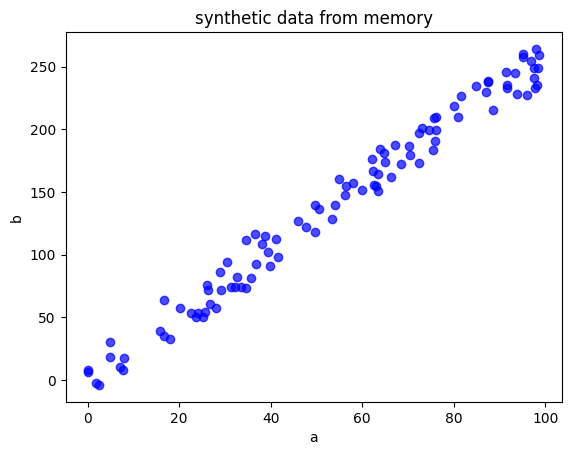

In [9]:
plt.scatter(df['a'], df['b'], color='blue', alpha=.7)
plt.xlabel('a')
plt.ylabel('b')
plt.title('synthetic data from memory')

In [7]:
# nice. we are here. lets for fun try to use this data for training a linear model with pytorch

In [92]:
import torch
import torch.nn as nn

In [93]:
t1 = torch.tensor(df['a'].values, dtype=torch.float32).view(-1, 1)
t1.requires_grad_()

tensor([[93.4678],
        [26.3384],
        [72.4385],
        [24.2187],
        [54.9231],
        [75.6446],
        [22.6241],
        [63.0094],
        [87.3984],
        [36.6275],
        [66.3321],
        [31.2368],
        [62.3230],
        [53.3241],
        [34.5856],
        [81.5452],
        [70.3001],
        [16.6101],
        [63.4428],
        [80.8443],
        [28.9234],
        [41.6708],
        [95.1033],
        [50.5851],
        [64.6746],
        [36.8816],
        [87.1423],
        [88.5653],
        [75.4292],
        [76.0973],
        [33.5832],
        [98.0275],
        [72.3353],
        [62.1950],
        [56.4299],
        [75.9949],
        [63.3922],
        [39.8225],
        [96.8465],
        [93.7234],
        [34.6073],
        [67.1321],
        [47.6335],
        [41.0814],
        [32.6018],
        [98.1107],
        [56.2138],
        [17.9000],
        [28.0622],
        [30.4752],
        [29.1168],
        [97.8390],
        [ 4.

In [94]:
t2 = torch.tensor(df['b'].values, dtype=torch.float32).view(-1, 1)
t2.requires_grad_()

tensor([[244.6696],
        [ 71.8461],
        [197.0962],
        [ 53.5468],
        [160.3078],
        [209.1115],
        [ 53.5603],
        [154.5235],
        [237.4960],
        [116.5686],
        [161.8304],
        [ 74.0921],
        [166.8074],
        [128.3103],
        [ 73.4640],
        [226.8630],
        [186.7503],
        [ 63.5253],
        [150.6071],
        [210.1109],
        [ 86.3085],
        [ 98.1770],
        [257.7582],
        [136.4627],
        [180.6865],
        [ 92.2039],
        [229.8558],
        [215.4132],
        [183.5729],
        [199.2431],
        [ 73.9581],
        [264.0686],
        [172.8383],
        [176.4875],
        [155.0748],
        [190.9872],
        [164.4805],
        [ 90.5563],
        [254.1161],
        [228.3086],
        [111.5183],
        [187.8302],
        [122.0838],
        [112.7036],
        [ 82.5046],
        [235.2768],
        [147.5344],
        [ 32.7500],
        [ 57.1554],
        [ 94.1881],


In [95]:
model = nn.Linear(in_features=1, out_features=1)

In [96]:
loss_fn = nn.MSELoss()

In [97]:
opt = torch.optim.SGD(model.parameters(), lr=.0001)

In [98]:
epochs = 2000

In [99]:
t1.shape

torch.Size([100, 1])

In [100]:
for epoch in range(epochs):
    pred = model(t1)
    loss = loss_fn(pred, t2)
    opt.zero_grad()
    loss.backward()
    opt.step()

    if epoch % 200 == 0:
        print('worked')
        print(model.weight.item())
        

worked
2.036809206008911
worked
2.5987229347229004
worked
2.5988290309906006
worked
2.5989344120025635
worked
2.59903883934021
worked
2.59914231300354
worked
2.5992448329925537
worked
2.599346399307251
worked
2.599447011947632
worked
2.5995469093322754


In [101]:
model.bias.item()

0.07304712384939194

In [102]:
t3 = torch.tensor([[5.0]], requires_grad=True)

In [103]:
model(t3)

tensor([[13.0713]], grad_fn=<AddmmBackward0>)

In [110]:
output = []
for i in range(len(t1)):
    output.append(t1[i])

In [112]:
real = []
for i in range(len(t1)):
    real.append(model(t1[i]))

In [117]:
t1.detach.numpy()
plt.scatter(output, real, color='blue', alpha=.7)

AttributeError: 'builtin_function_or_method' object has no attribute 'numpy'